In [ ]:

#**CNN keras Tensorflow-MNIST** 

#**By Maryam Madadgar**


# **Research Objective:**

In this project , I used the MNIST(jpg) data set from https://www.kaggle.com/datasets/scolianni/mnistasjpg. The objective is to achieve the high accuracy on image processing. I used CNN keras method.  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX, trainY, testX, testY
x_train, y_train, x_test, y_test = load_dataset()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [3]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(70, (3, 3), input_shape=(28, 28, 1), activation='relu'))
# Batch Normalization LAYER
model.add(BatchNormalization())
# POOLING LAYER
model.add(MaxPooling2D((2, 2)))
# DENSE HIDDEN LAYER 
model.add(Dense(70, activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D((4, 4)))
#  DENSE HIDDEN LAYER 
model.add(Dense(140, activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D((3, 3)))
# CONVOLUTIONAL LAYER
# HIDDEN LAYER 
model.add(Dense(170, activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D((1, 1)))
# FLATTEN IMAGES 
model.add(Flatten())
# 100 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(100, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['mae', 'accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 70)        700       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 70)       280       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 70)       0         
 )                                                               
                                                                 
 dense (Dense)               (None, 13, 13, 70)        4970      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 70)         0         
 2D)                                                             
                                                        

In [6]:
model.fit(x_train, y_train, batch_size=30, validation_data=(x_test, y_test), epochs=30)

Epoch 1/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0507 - mae: 0.0046 - accuracy: 0.9834 - val_loss: 0.1054 - val_mae: 0.0071 - val_accuracy: 0.9716
Epoch 2/30
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0532 - mae: 0.0047 - accuracy: 0.9831 - val_loss: 0.1088 - val_mae: 0.0070 - val_accuracy: 0.9711
Epoch 3/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0517 - mae: 0.0046 - accuracy: 0.9833 - val_loss: 0.1177 - val_mae: 0.0067 - val_accuracy: 0.9726
Epoch 4/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0484 - mae: 0.0042 - accuracy: 0.9848 - val_loss: 0.1203 - val_mae: 0.0079 - val_accuracy: 0.9674
Epoch 5/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0526 - mae: 0.0045 - accuracy: 0.9837 - val_loss: 0.1186 - val_mae: 0.0078 - val_accuracy: 0.9681
Epoch 6/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0443 - mae: 0.0040 - accuracy: 0.9855

In [7]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,mae,accuracy,val_loss,val_mae,val_accuracy
0,0.050734,0.004644,0.983417,0.105421,0.007125,0.9716
1,0.053190,0.004686,0.983133,0.108754,0.006966,0.9711
2,0.051678,0.004620,0.983250,0.117693,0.006714,0.9726
3,0.048427,0.004241,0.984850,0.120290,0.007855,0.9674
4,0.052558,0.004541,0.983717,0.118615,0.007751,0.9681


<Axes: >

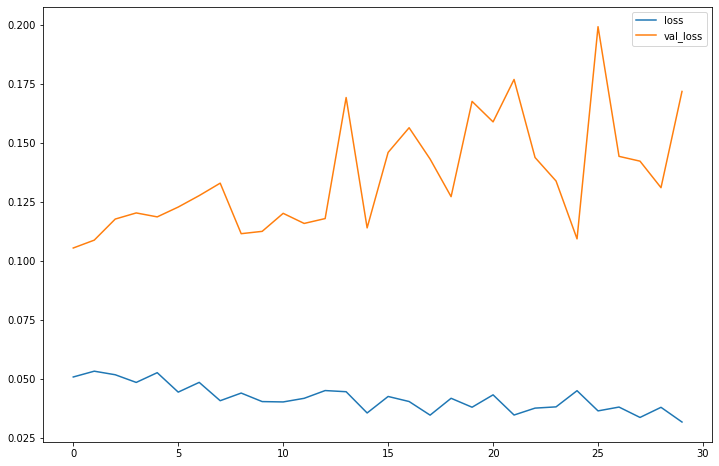

In [8]:
losses[['loss','val_loss']].plot(figsize=(12,8))


<Axes: >

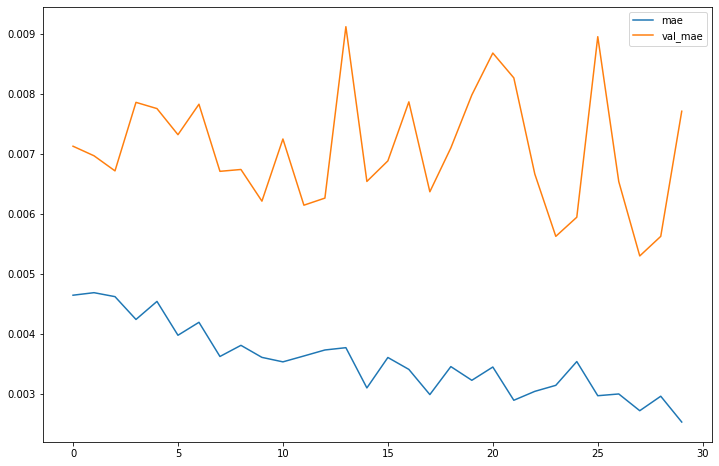

In [9]:
losses[['mae','val_mae']].plot(figsize=(12,8))


<Axes: >

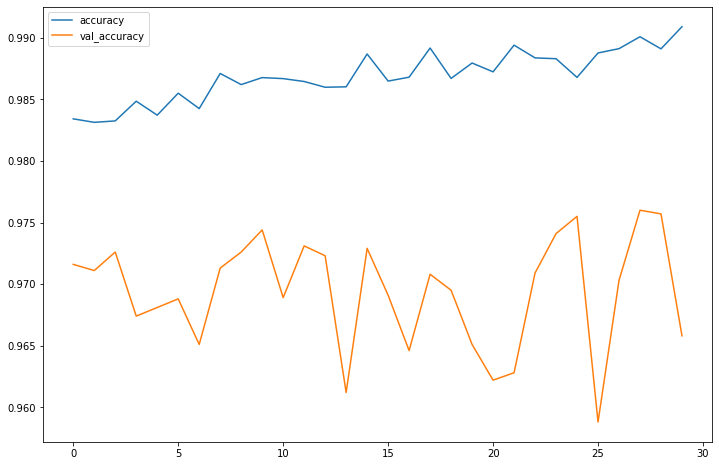

In [10]:
losses[['accuracy','val_accuracy']].plot(figsize=(12,8))


#**Conclusion:**

I could reach to 99% accuracy in train data set and 97.6% in test data set with epoch=28 with CNN Keras method on MNIST data set. I can reach to more accuracy in this project rather than my previous model by removing the "kernel_initializer='he_uniform'. It means its default in Keras CNN works better for this dataset. Also adding epoches to 30 affects to increasing accuracies in both train and test datasets. 

#**Refrences:**

1-https://www.kaggle.com/datasets/scolianni/mnistasjpg

2-https://keras.io/api/
